In [1]:
import seaborn as sns 
import matplotlib.pyplot as plt
import pandas as pd


@author: Charlotta Mirbach

## Task 
- visualize change detection from rasters (see `code/raster_change_detection.R`)
- input data: raster files (e.g. tif) form the same area at different time points (same resolution required)
- output: visual representation of change detection (e.g. difference map, change map, etc.)

In [2]:
# load data
frequencies = pd.read_csv('../data/processed/2024_frequencies_tr_0.5.csv')

# filter for rows where value is 1
frequencies_1 = frequencies[frequencies['value'] == 1].drop(columns=['value'])

# Determine which models and scenarios exceed the threshold of 2256442
exceeds_threshold = frequencies_1.set_index('layer') > 2256442

frequencies_1, exceeds_threshold

(           layer  count_126_2041  count_370_2041  count_585_2041  \
 1      GFDL-ESM4         1893131         2367870         2368454   
 3   IPSL-CM6A-LR         4057245         3643034         2282699   
 5  MPI-ESM1-2-HR         3058321         2820317         3134738   
 7     MRI-ESM2-0         3474312         3468407         2368454   
 9    UKESM1-0-LL         1657435         1174170         1082752   
 
    count_126_2071  count_370_2071  count_585_2071  
 1         1813732         1973273         1812002  
 3         3325475         1125857          520203  
 5         3240379         2389367          495100  
 7         3092096         3328055         2442130  
 9         1304412          340433          169980  ,
                count_126_2041  count_370_2041  count_585_2041  count_126_2071  \
 layer                                                                           
 GFDL-ESM4               False            True            True           False   
 IPSL-CM6A-LR      

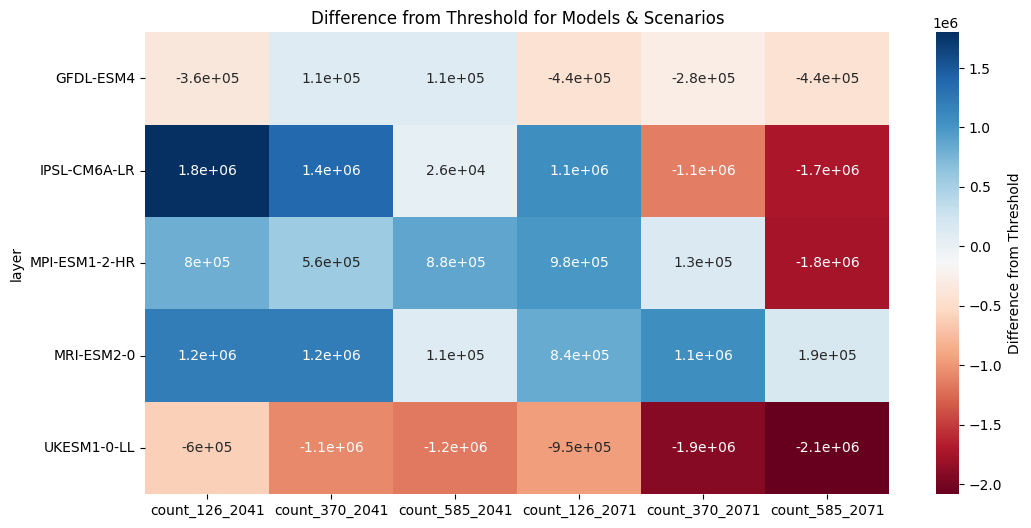

In [4]:
# plot heatmap based on threshold
difference_from_threshold = frequencies_1.set_index('layer') - 2256442

# Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(difference_from_threshold, annot=True, cmap='RdBu', cbar_kws={'label': 'Difference from Threshold'})
plt.title('Difference from Threshold for Models & Scenarios')
plt.show()